In [94]:
import pandas as pd 
df=pd.read_csv('train_data.csv')  #read the csv file into pandas frame

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df["DateID"] = pd.to_datetime(df["DateID"], format = "%m/%d/%Y")

In [97]:
df['DateID'] = df['DateID'].dt.strftime('%d-%m-%Y')

In [98]:
df

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,06-11-2021,7
1,category_4,836584,18-11-2021,16
2,category_1,370195,24-01-2022,6
3,category_2,172582,30-10-2021,5
4,category_2,1006009,30-10-2021,5
...,...,...,...,...
19916,category_2,225259,04-10-2021,4
19917,category_2,111436,12-10-2021,1
19918,category_2,1098502,01-10-2021,1
19919,category_2,20824,01-10-2021,7


In [76]:
df.columns

Index(['CategoryCode', 'ItemCode', 'DateID', 'DailySales'], dtype='object')

In [77]:
corr_matrix = df.corr().round(2)
corr_matrix

,ItemCode,DailySales
ItemCode,1.00,-0.13
DailySales,-0.13,1.00


In [78]:
import datetime
df['Date'] = pd.to_datetime(df['DateID'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['week'] = pd.DatetimeIndex(df['Date']).week
#df['week'] = pd.DatetimeIndex(df['Date'].isocalendar().week)
df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19921 entries, 0 to 19920
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CategoryCode    19921 non-null  object
 1   ItemCode        19921 non-null  int64 
 2   DateID          19921 non-null  object
 3   DailySales      19921 non-null  int64 
 4   Date            19921 non-null  object
 5   year            19921 non-null  int64 
 6   month           19921 non-null  int64 
 7   day             19921 non-null  int64 
 8   week            19921 non-null  int64 
 9   dayofyear       19921 non-null  int64 
 10  weekday         19921 non-null  int64 
 11  quarter         19921 non-null  int64 
 12  is_month_start  19921 non-null  bool  
 13  is_month_end    19921 non-null  bool  
dtypes: bool(2), int64(9), object(3)
memory usage: 1.9+ MB
None


<ipython-input-78-f28c6211e45d>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = pd.DatetimeIndex(df['Date']).week


In [79]:
df

,CategoryCode,ItemCode,DateID,DailySales,Date,year,month,day,week,dayofyear,weekday,quarter,is_month_start,is_month_end
0,category_2,117610,06-11-2021,7,11.06.2021,2021,11,6,44,310,5,4,False,False
1,category_4,836584,18-11-2021,16,18.11.2021,2021,11,18,46,322,3,4,False,False
2,category_1,370195,24-01-2022,6,24.01.2022,2022,1,24,4,24,0,1,False,False
3,category_2,172582,30-10-2021,5,30.10.2021,2021,10,30,43,303,5,4,False,False
4,category_2,1006009,30-10-2021,5,30.10.2021,2021,10,30,43,303,5,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,category_2,225259,04-10-2021,4,10.04.2021,2021,10,4,40,277,0,4,False,False
19917,category_2,111436,12-10-2021,1,10.12.2021,2021,10,12,41,285,1,4,False,False
19918,category_2,1098502,01-10-2021,1,10.01.2021,2021,10,1,39,274,4,4,True,False
19919,category_2,20824,01-10-2021,7,10.01.2021,2021,10,1,39,274,4,4,True,False


## Analyze the relationship between features using a correlation matrix

In [80]:
corr_matrix = df.corr().round(2)
corr_matrix

,ItemCode,DailySales,year,month,day,week,dayofyear,weekday,quarter,is_month_start,is_month_end
ItemCode,1.00,-0.13,-0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01
DailySales,-0.13,1.00,0.01,-0.00,0.00,-0.01,-0.00,-0.00,-0.01,0.00,0.01
year,-0.01,0.01,1.00,-0.99,-0.13,-0.94,-0.99,0.02,-1.00,0.04,-0.03
month,0.01,-0.00,-0.99,1.00,0.12,0.95,1.00,-0.03,0.99,-0.04,0.03
day,0.01,0.00,-0.13,0.12,1.00,0.12,0.18,0.02,0.13,-0.31,0.31
week,0.01,-0.01,-0.94,0.95,0.12,1.00,0.95,0.01,0.94,0.04,0.04
dayofyear,0.01,-0.00,-0.99,1.00,0.18,0.95,1.00,-0.02,0.99,-0.05,0.05
weekday,0.01,-0.00,0.02,-0.03,0.02,0.01,-0.02,1.00,-0.02,-0.07,-0.03
quarter,0.01,-0.01,-1.00,0.99,0.13,0.94,0.99,-0.02,1.00,-0.04,0.03
is_month_start,0.00,0.00,0.04,-0.04,-0.31,0.04,-0.05,-0.07,-0.04,1.00,-0.04


### Starting the week count from the first week given in the dataset

In [81]:
df['week'].mask(df['week'] < 38, (df['week']+14), inplace=True)

In [82]:
df['week'].mask(df['week'] > 38, (df['week']-38), inplace=True)

In [83]:
df.head(50)

,CategoryCode,ItemCode,DateID,DailySales,Date,year,month,day,week,dayofyear,weekday,quarter,is_month_start,is_month_end
0,category_2,117610,06-11-2021,7,11.06.2021,2021,11,6,6,310,5,4,False,False
1,category_4,836584,18-11-2021,16,18.11.2021,2021,11,18,8,322,3,4,False,False
2,category_1,370195,24-01-2022,6,24.01.2022,2022,1,24,18,24,0,1,False,False
3,category_2,172582,30-10-2021,5,30.10.2021,2021,10,30,5,303,5,4,False,False
4,category_2,1006009,30-10-2021,5,30.10.2021,2021,10,30,5,303,5,4,False,False
5,category_2,903976,06-01-2022,1,01.06.2022,2022,1,6,15,6,3,1,False,False
6,category_1,145978,30-10-2021,3,30.10.2021,2021,10,30,5,303,5,4,False,False
7,category_1,1061341,24-01-2022,5,24.01.2022,2022,1,24,18,24,0,1,False,False
8,category_1,371239,05-01-2022,1,01.05.2022,2022,1,5,15,5,2,1,False,False
9,category_2,865933,08-02-2022,3,02.08.2022,2022,2,8,20,39,1,1,False,False


In [84]:
df

,CategoryCode,ItemCode,DateID,DailySales,Date,year,month,day,week,dayofyear,weekday,quarter,is_month_start,is_month_end
0,category_2,117610,06-11-2021,7,11.06.2021,2021,11,6,6,310,5,4,False,False
1,category_4,836584,18-11-2021,16,18.11.2021,2021,11,18,8,322,3,4,False,False
2,category_1,370195,24-01-2022,6,24.01.2022,2022,1,24,18,24,0,1,False,False
3,category_2,172582,30-10-2021,5,30.10.2021,2021,10,30,5,303,5,4,False,False
4,category_2,1006009,30-10-2021,5,30.10.2021,2021,10,30,5,303,5,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,category_2,225259,04-10-2021,4,10.04.2021,2021,10,4,2,277,0,4,False,False
19917,category_2,111436,12-10-2021,1,10.12.2021,2021,10,12,3,285,1,4,False,False
19918,category_2,1098502,01-10-2021,1,10.01.2021,2021,10,1,1,274,4,4,True,False
19919,category_2,20824,01-10-2021,7,10.01.2021,2021,10,1,1,274,4,4,True,False


### getting only the useful features form the dataframe

In [85]:
df_new=df[['CategoryCode', 'ItemCode','week','DailySales']]

In [86]:
df_new

,CategoryCode,ItemCode,week,DailySales
0,category_2,117610,6,7
1,category_4,836584,8,16
2,category_1,370195,18,6
3,category_2,172582,5,5
4,category_2,1006009,5,5
...,...,...,...,...
19916,category_2,225259,2,4
19917,category_2,111436,3,1
19918,category_2,1098502,1,1
19919,category_2,20824,1,7


In [87]:
dt=df_new.groupby(['CategoryCode','ItemCode','week']).agg({'DailySales':['sum']})

In [88]:
dt.head(20)

DailySales
                                  sum
CategoryCode ItemCode week           
category_1   3418     1            29
                      2            42
                      3            41
                      4            41
                      5            44
                      6            46
                      7            43
                      8            49
                      9            54
                      10           69
                      11          101
                      12           73
                      13           75
                      14           56
                      15           83
                      16           85
                      17           89
                      18           67
                      19          109
                      20           72

In [89]:
dt.columns=['WeeklySales']

In [90]:
dt=dt.reset_index()

In [91]:
dt.head(50)

,CategoryCode,ItemCode,week,WeeklySales
0,category_1,3418,1,29
1,category_1,3418,2,42
2,category_1,3418,3,41
3,category_1,3418,4,41
4,category_1,3418,5,44
5,category_1,3418,6,46
6,category_1,3418,7,43
7,category_1,3418,8,49
8,category_1,3418,9,54
9,category_1,3418,10,69


In [92]:
dt_category1=dt[dt['CategoryCode']=='category_1']

In [93]:
dt_category2=dt[dt['CategoryCode']=='category_2']

In [367]:
dt_category3=dt[dt['CategoryCode']=='category_3']

In [368]:
dt_category4=dt[dt['CategoryCode']=='category_4']

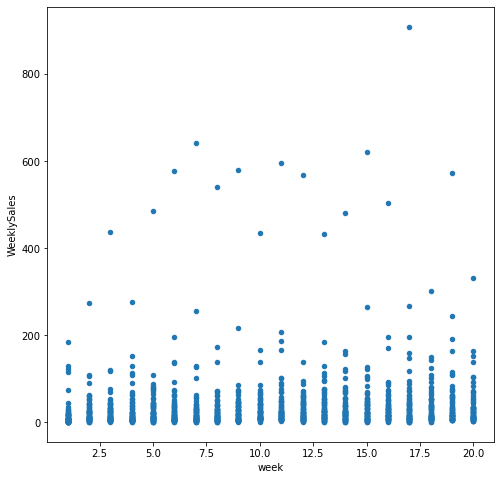

In [369]:
dt_category1.plot(kind = 'scatter',
           x = 'week',
           y = 'WeeklySales',
           figsize=(8,8))
plt.savefig('Week vs WeeklySales in Category 1.png')
plt.show()

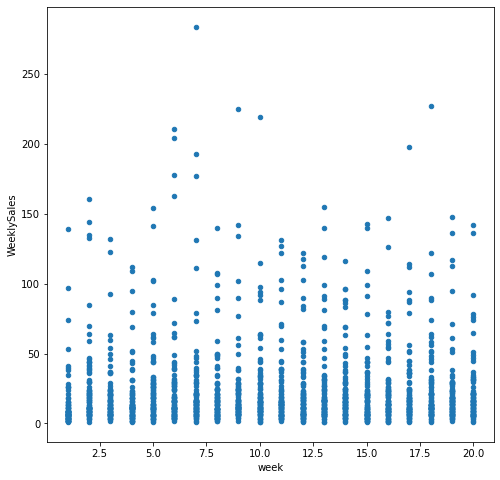

In [370]:
dt_category2.plot(kind = 'scatter',
           x = 'week',
           y = 'WeeklySales',
           figsize=(8,8))
plt.savefig('Week vs WeeklySales in Category 2.png')
plt.show()

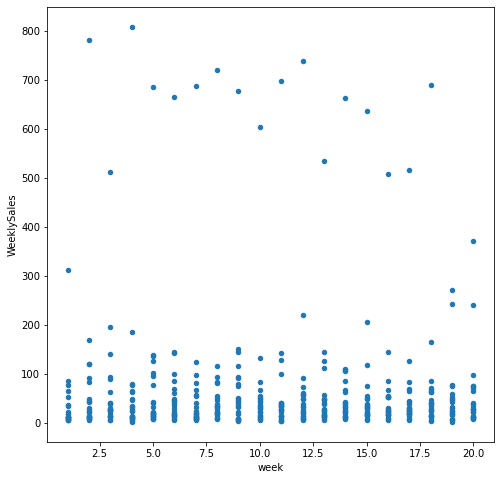

In [371]:
dt_category3.plot(kind = 'scatter',
           x = 'week',
           y = 'WeeklySales',
           figsize=(8,8))
plt.savefig('Week vs WeeklySales in Category 3.png')
plt.show()

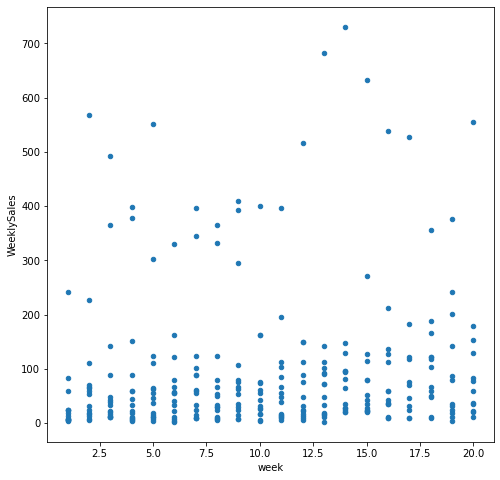

In [372]:
dt_category4.plot(kind = 'scatter',
           x = 'week',
           y = 'WeeklySales',
           figsize=(8,8))
plt.savefig('Week vs WeeklySales in Category 4.png')
plt.show()

In [373]:
validation_data = pd.read_csv('validation_data.csv')  #read the csv file into pandas frame

In [374]:
corr_matrix = dt.corr().round(2)
corr_matrix

,ItemCode,week,WeeklySales
ItemCode,1.00,0.01,-0.16
week,0.01,1.00,0.04
WeeklySales,-0.16,0.04,1.00


In [375]:
id_list=dt['ItemCode'].unique() #get a list of unique item codes

In [376]:
id_list

array([   3418,    3427,   17287,   17296,   24136,   35449,   35530,
         35584,   36898,   37510,   38518,   42424,   42496,   43657,
         43738,   48940,   59047,   76399,   86992,  119554,  124774,
        142756,  145330,  145978,  370195,  371104,  371239,  379249,
        416212,  755584,  839356,  839374, 1015621, 1021264, 1030948,
       1032532, 1032541, 1032550, 1032559, 1032568, 1032586, 1044610,
       1044619, 1044682, 1044691, 1047967, 1048975, 1049776, 1050046,
       1054978, 1056463, 1058713, 1061341, 1061638, 1067119, 1067128,
       1068883, 1075651, 1077118, 1081321, 1081339, 1084498, 1085749,
       1090105, 1090114, 1090294, 1090303,    9925,   20824,   23569,
         30877,   32245,   39436,   40759,   41830,   43630,   50785,
         57058,   59749,   64978,   65788,   75886,   86974,   87046,
         87559,   99079,  110320,  111382,  111436,  117610,  118033,
        124954,  130993,  132028,  138742,  172033,  172582,  173617,
        174436,  210

In [377]:
validation_data=pd.read_csv('validation_data.csv')  #read the csv file into pandas frame

In [378]:
id_list_validation=validation_data['ItemCode'].unique()

In [379]:
id_list_validation

array([1044502, 1105009,  913561, 1048975,   17287,  371239, 1098502,
       1074823,   23569,  397213,  211309, 1058713, 1032550, 1071106,
         40759, 1067092, 1101661,  210868,  379249,   75886, 1044682,
       1090303, 1084498, 1064473, 1030948, 1090276,  138742,   24136,
        836125,   64978, 1032541,  865933,  836152,  839356,  906586,
         30877,  173617, 1006108, 1064572,  416212,   35584, 1070836,
         43657,  110320,    3427,  877624, 1090105,  248272,  124954,
       1097143, 1098493,  745945,   48940,   86974, 1076938,   59047,
        172582, 1044619, 1013335, 1015621, 1047130,  132028, 1010068,
       1066570, 1076920, 1071124,  172033,  399220,  142756, 1006009,
       1003156, 1090294,   99079, 1050046, 1026871,   59749,  118033,
          3418,  124774, 1003147,    7666,  245581, 1081087, 1061638,
         17296, 1090240,   76399,  131983,   50785,  755584,  267496,
         20824, 1060909, 1090114, 1032586], dtype=int64)

In [380]:
validation_data.rename(columns = {'Week':'week'}, inplace = True)

In [381]:
validation_data

,CategoryCode,ItemCode,week,WeeklySales
0,category_2,1044502,w1,11
1,category_2,1105009,w1,11
2,category_2,913561,w4,5
3,category_1,1048975,w4,30
4,category_1,17287,w2,60
...,...,...,...,...
365,category_2,124954,w2,43
366,category_2,40759,w1,48
367,category_1,1090303,w1,19
368,category_2,1090276,w3,6


In [382]:
validation_data['week'].replace({'w1':1,'w2':2,'w3':3,'w4':4},inplace=True)

In [383]:
validation_data['CategoryCode'].replace({'category_1':1,'category_2':2,'category_3':3,'category_4':4},inplace=True)

In [384]:
validation_data

,CategoryCode,ItemCode,week,WeeklySales
0,2,1044502,1,11
1,2,1105009,1,11
2,2,913561,4,5
3,1,1048975,4,30
4,1,17287,2,60
...,...,...,...,...
365,2,124954,2,43
366,2,40759,1,48
367,1,1090303,1,19
368,2,1090276,3,6


## Check the validation of the model

In [385]:
dt_val=dt.copy(deep=True)

In [386]:
dt_val['CategoryCode'].replace({'category_1':1,'category_2':2,'category_3':3,'category_4':4},inplace=True)

In [387]:
dt_val

,CategoryCode,ItemCode,week,WeeklySales
0,1,3418,1,29
1,1,3418,2,42
2,1,3418,3,41
3,1,3418,4,41
4,1,3418,5,44
...,...,...,...,...
3767,4,1082743,15,24
3768,4,1082743,16,9
3769,4,1082743,17,75
3770,4,1082743,18,60


In [388]:
errors=[]
all_y_test_predicted=[]
all_Y_test=[]
for id in id_list_validation:
    dt_item=dt_val[dt_val['ItemCode']==id]
    validation_data_item=validation_data[validation_data['ItemCode']==id]
    X_train= dt_item[['week','CategoryCode']]
    Y_train=dt_item['WeeklySales']
    X_test = validation_data_item[['week','CategoryCode']]
    Y_test = validation_data_item['WeeklySales']
    #from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.linear_model import LinearRegression
    model=LinearRegression(normalize=True)
    #model =ExtraTreesRegressor()
    model.fit(X_train, Y_train)
    y_test_predicted = model.predict(X_test)
    all_y_test_predicted+=list(y_test_predicted.round(0))
    all_Y_test+=list(Y_test)
    
    
    
    

In [389]:
all_Y_test

[11,
 13,
 48,
 11,
 11,
 10,
 19,
 10,
 5,
 9,
 5,
 4,
 30,
 28,
 25,
 60,
 60,
 64,
 57,
 83,
 18,
 18,
 11,
 9,
 7,
 4,
 7,
 6,
 23,
 72,
 53,
 84,
 2,
 20,
 60,
 20,
 4,
 3,
 6,
 20,
 18,
 23,
 15,
 13,
 65,
 85,
 67,
 70,
 16,
 7,
 22,
 14,
 48,
 84,
 39,
 25,
 65,
 63,
 82,
 48,
 139,
 138,
 92,
 118,
 54,
 69,
 88,
 64,
 10,
 10,
 5,
 4,
 84,
 98,
 43,
 87,
 11,
 17,
 19,
 5,
 35,
 50,
 15,
 40,
 11,
 14,
 14,
 19,
 39,
 29,
 15,
 46,
 33,
 27,
 28,
 28,
 11,
 10,
 14,
 12,
 4,
 3,
 10,
 6,
 24,
 25,
 17,
 27,
 37,
 44,
 56,
 20,
 38,
 42,
 40,
 37,
 6,
 16,
 12,
 11,
 68,
 98,
 214,
 50,
 39,
 31,
 15,
 68,
 29,
 36,
 22,
 52,
 137,
 64,
 87,
 116,
 13,
 7,
 6,
 10,
 93,
 118,
 107,
 65,
 13,
 22,
 16,
 23,
 30,
 13,
 30,
 11,
 8,
 13,
 24,
 9,
 3,
 8,
 14,
 19,
 19,
 26,
 13,
 15,
 19,
 21,
 18,
 21,
 17,
 23,
 17,
 11,
 33,
 21,
 31,
 38,
 56,
 33,
 7,
 72,
 25,
 59,
 24,
 38,
 14,
 11,
 13,
 5,
 15,
 18,
 15,
 20,
 14,
 33,
 13,
 43,
 27,
 32,
 43,
 47,
 10,
 9,
 8,
 9,
 30,

In [390]:
all_y_test_predicted

[18.0,
 17.0,
 18.0,
 17.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 5.0,
 1.0,
 -1.0,
 3.0,
 9.0,
 11.0,
 7.0,
 10.0,
 11.0,
 11.0,
 10.0,
 12.0,
 6.0,
 6.0,
 6.0,
 6.0,
 308.0,
 261.0,
 292.0,
 277.0,
 19.0,
 19.0,
 19.0,
 19.0,
 13.0,
 12.0,
 11.0,
 13.0,
 13.0,
 13.0,
 12.0,
 12.0,
 31.0,
 32.0,
 29.0,
 28.0,
 22.0,
 22.0,
 20.0,
 21.0,
 25.0,
 25.0,
 25.0,
 26.0,
 57.0,
 56.0,
 57.0,
 56.0,
 112.0,
 113.0,
 114.0,
 111.0,
 21.0,
 20.0,
 23.0,
 18.0,
 8.0,
 7.0,
 7.0,
 7.0,
 22.0,
 26.0,
 32.0,
 29.0,
 9.0,
 9.0,
 8.0,
 8.0,
 38.0,
 38.0,
 37.0,
 39.0,
 5.0,
 6.0,
 6.0,
 5.0,
 24.0,
 25.0,
 24.0,
 24.0,
 37.0,
 36.0,
 37.0,
 37.0,
 6.0,
 6.0,
 6.0,
 6.0,
 13.0,
 13.0,
 12.0,
 13.0,
 23.0,
 23.0,
 23.0,
 23.0,
 38.0,
 37.0,
 39.0,
 40.0,
 25.0,
 28.0,
 27.0,
 24.0,
 5.0,
 5.0,
 5.0,
 5.0,
 73.0,
 83.0,
 78.0,
 88.0,
 33.0,
 31.0,
 32.0,
 30.0,
 17.0,
 17.0,
 17.0,
 16.0,
 19.0,
 25.0,
 22.0,
 29.0,
 6.0,
 7.0,
 7.0,
 6.0,
 55.0,
 59.0,
 57.0,
 54.0,
 20.0,
 20.0,
 19.0,
 19.

In [391]:
from sklearn.metrics import mean_absolute_error as mape
error_for_linear_regression_model = mape(all_Y_test,all_y_test_predicted).round(2)


In [392]:
error_for_linear_regression_model*100

2352.0

## Train the model using Linear Regression Algorithm and test the given data and get the predictions

In [393]:
final={}
for id in id_list:
    dt_item=dt[dt['ItemCode']==id]
    X_train= dt_item[['week']]
    Y_train=dt_item['WeeklySales']
    X_test=[[21],[22],[23],[24]]
    from sklearn.linear_model import LinearRegression
    model =LinearRegression(normalize=True)
    model.fit(X_train, Y_train)
    y_test_predicted = model.predict(X_test)
    result=y_test_predicted.round(0)
    final[id]=result

In [394]:
final

{3418: array([ 95.,  99., 102., 105.]),
 3427: array([50., 51., 52., 52.]),
 17287: array([33., 35., 36., 37.]),
 17296: array([598., 609., 620., 631.]),
 24136: array([23., 23., 22., 21.]),
 35449: array([23., 24., 25., 26.]),
 35530: array([16., 16., 16., 17.]),
 35584: array([10., 11., 11., 11.]),
 36898: array([91., 93., 95., 96.]),
 37510: array([7., 8., 8., 8.]),
 38518: array([23., 23., 24., 24.]),
 42424: array([58., 60., 62., 64.]),
 42496: array([47., 48., 49., 50.]),
 43657: array([14., 15., 15., 16.]),
 43738: array([27., 28., 29., 30.]),
 48940: array([21., 22., 23., 23.]),
 59047: array([13., 13., 14., 14.]),
 76399: array([46., 47., 49., 50.]),
 86992: array([84., 87., 90., 93.]),
 119554: array([214., 220., 226., 231.]),
 124774: array([23., 23., 23., 23.]),
 142756: array([55., 57., 59., 60.]),
 145330: array([16., 16., 16., 17.]),
 145978: array([44., 45., 46., 47.]),
 370195: array([59., 60., 61., 62.]),
 371104: array([13., 13., 14., 14.]),
 371239: array([22., 23.,

In [395]:
test_data = pd.read_csv('test_data.csv')  #read the csv file into pandas frame

In [396]:
test_data

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,NaN
1,category_2,1006090,w1,NaN
2,category_2,1076929,w4,NaN
3,category_1,1081321,w3,NaN
4,category_2,216151,w4,NaN
...,...,...,...,...
372,category_2,1101571,w1,NaN
373,category_2,1090258,w4,NaN
374,category_2,906595,w1,NaN
375,category_2,32245,w1,NaN


In [397]:
def updatesales(code,week):
    week_no=int(week[1])
    new_sales=final[code][week_no-1]
    print(new_sales)
    return int(new_sales)
sales_list=[]
for i in range(377):
    row=test_data.iloc[i]
    code=row[1]
    week=row[2]
    
    new_sale=updatesales(code,week)
    sales_list.append(new_sale)
test_data['PredictedSales']=sales_list

30.0
28.0
19.0
14.0
19.0
12.0
62.0
132.0
8.0
21.0
32.0
25.0
546.0
92.0
30.0
77.0
38.0
23.0
18.0
7.0
18.0
10.0
36.0
36.0
25.0
-3.0
80.0
16.0
12.0
14.0
58.0
7.0
11.0
29.0
31.0
220.0
3.0
1.0
16.0
484.0
22.0
17.0
-25.0
10.0
17.0
31.0
18.0
13.0
18.0
85.0
16.0
14.0
27.0
8.0
13.0
75.0
7.0
55.0
192.0
12.0
26.0
103.0
30.0
10.0
26.0
10.0
16.0
29.0
56.0
93.0
90.0
8.0
32.0
10.0
87.0
61.0
14.0
93.0
50.0
21.0
40.0
9.0
47.0
19.0
13.0
198.0
159.0
-1.0
22.0
60.0
24.0
7.0
19.0
13.0
27.0
14.0
21.0
27.0
7.0
24.0
18.0
75.0
50.0
19.0
46.0
18.0
60.0
493.0
31.0
14.0
12.0
51.0
18.0
101.0
18.0
26.0
7.0
16.0
18.0
7.0
33.0
27.0
36.0
27.0
19.0
9.0
39.0
6.0
-20.0
16.0
19.0
5.0
30.0
18.0
16.0
16.0
35.0
47.0
17.0
29.0
28.0
11.0
231.0
11.0
8.0
34.0
17.0
42.0
44.0
-4.0
19.0
16.0
28.0
10.0
8.0
17.0
20.0
25.0
47.0
142.0
38.0
567.0
10.0
45.0
17.0
85.0
22.0
8.0
50.0
9.0
154.0
32.0
6.0
18.0
11.0
50.0
26.0
17.0
62.0
7.0
44.0
10.0
21.0
31.0
59.0
24.0
29.0
9.0
24.0
10.0
-6.0
16.0
64.0
49.0
74.0
16.0
16.0
37.0
146.0
11.0
7.0
16

In [398]:
len(sales_list)

377

In [399]:
test_data

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,30
1,category_2,1006090,w1,28
2,category_2,1076929,w4,19
3,category_1,1081321,w3,14
4,category_2,216151,w4,19
...,...,...,...,...
372,category_2,1101571,w1,37
373,category_2,1090258,w4,34
374,category_2,906595,w1,12
375,category_2,32245,w1,52


In [400]:
test_data['ID']=test_data['CategoryCode']+'_'+test_data['ItemCode'].astype(str)+'_'+test_data['Week']

In [401]:
test_data

,CategoryCode,ItemCode,Week,PredictedSales,ID
0,category_1,43738,w4,30,category_1_43738_w4
1,category_2,1006090,w1,28,category_2_1006090_w1
2,category_2,1076929,w4,19,category_2_1076929_w4
3,category_1,1081321,w3,14,category_1_1081321_w3
4,category_2,216151,w4,19,category_2_216151_w4
...,...,...,...,...,...
372,category_2,1101571,w1,37,category_2_1101571_w1
373,category_2,1090258,w4,34,category_2_1090258_w4
374,category_2,906595,w1,12,category_2_906595_w1
375,category_2,32245,w1,52,category_2_32245_w1


In [402]:
final_test_data = test_data.loc[0:,['ID','PredictedSales']]

In [403]:
final_test_data

,ID,PredictedSales
0,category_1_43738_w4,30
1,category_2_1006090_w1,28
2,category_2_1076929_w4,19
3,category_1_1081321_w3,14
4,category_2_216151_w4,19
...,...,...
372,category_2_1101571_w1,37
373,category_2_1090258_w4,34
374,category_2_906595_w1,12
375,category_2_32245_w1,52


In [404]:
final_test_data.to_csv('test_data1.csv')

### using linear regreesion for a item

In [405]:
dt_item1=dt[dt['ItemCode']==3418]

In [406]:
dt_item1

,CategoryCode,ItemCode,week,WeeklySales
0,category_1,3418,1,29
1,category_1,3418,2,42
2,category_1,3418,3,41
3,category_1,3418,4,41
4,category_1,3418,5,44
...,...,...,...,...
15,category_1,3418,16,85
16,category_1,3418,17,89
17,category_1,3418,18,67
18,category_1,3418,19,109


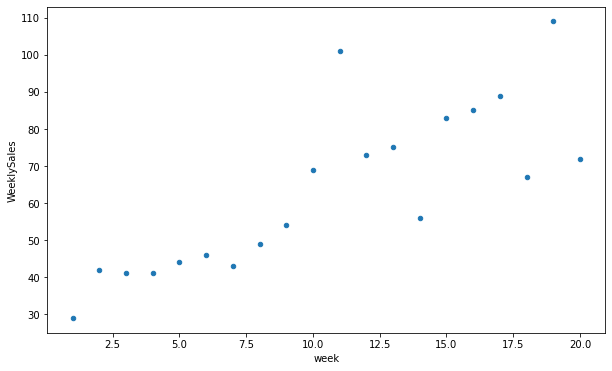

In [407]:
dt_item1.plot(kind = 'scatter',
           x = 'week',
           y = 'WeeklySales',
           figsize=(10,6))
plt.savefig('plot4.png')
plt.show()

In [408]:
X_train= dt_item1[['week']]
Y_train=dt_item1['WeeklySales']
X_test = validation_data_item[['week']]
Y_test = validation_data_item['WeeklySales']
from sklearn.linear_model import LinearRegression
model =LinearRegression(normalize=True)

model.fit(X_train, Y_train)
y_test_predicted = model.predict(X_test)
result=y_test_predicted.round(0)

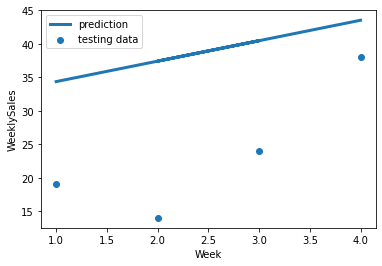

In [409]:
plt.scatter(X_test, Y_test,
label='testing data');
plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)
plt.xlabel('Week'); plt.ylabel('WeeklySales')
plt.legend(loc='upper left')
plt.savefig("prediction of the testing data")
plt.show()

## Using xgboost regression and Random Forest regression models to train the model and test the model since linear regression model is not that much accurate

In [410]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [411]:
df = pd.read_csv("train_data2.csv")

In [412]:
pd.set_option('display.max_rows', 10)

In [413]:
training_range = pd.date_range('2021-10-01', '2022-02-13')
testing_range = pd.date_range('2022-02-20', '2022-03-13', freq='W-SUN')

In [414]:
def week_of_month(sunday):
    return (sunday.day - 1) // 7 + 1

In [415]:
def data_for_item(item_code):
    filtered_df = df.loc[df['ItemCode'] == item_code]
    filtered_df["DateID"] = pd.to_datetime(filtered_df["DateID"], format = "%m/%d/%Y")
        
    filtered_df.set_index(filtered_df.DateID, inplace=True)
    filtered_df.drop('DateID', axis=1, inplace=True)
    filtered_df.drop('ItemCode', axis = 1, inplace = True)
    filtered_df.drop('CategoryCode', axis = 1, inplace = True)
    
    average_sales = 0.5*sum(filtered_df.DailySales) / len(filtered_df)
    for date in training_range:
        if date not in filtered_df.index:
            filtered_df.loc[date] = [0]
    
    filtered_df = filtered_df.sort_index()
        
    weekly_sales = filtered_df.groupby(pd.Grouper(freq='W')).sum()
    weekly_sales.rename(columns = {'DailySales': 'WeeklySales'}, inplace = True)
    weekly_sales = create_lag(weekly_sales)
    weekly_sales['month'] = weekly_sales.index.month
    weekly_sales['week'] = weekly_sales.index.map(week_of_month)
    train_x = weekly_sales.loc[:, weekly_sales.columns != 'WeeklySales']
    train_y = weekly_sales['WeeklySales']
    return weekly_sales, train_x, train_y

In [416]:
def create_lag(df3):
    dataframe = pd.DataFrame()
    for i in range(2, 0, -1):
        dataframe['t-' + str(i)] = df3.WeeklySales.shift(i)
    df4 = pd.concat([df3, dataframe], axis=1)
    df4.dropna(inplace=True)
    return df4

In [417]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [418]:
def train_predict(weekly_sales, train_x, train_y):
    model = RandomForestRegressor(n_estimators=6, max_depth=10, random_state = 10)

    fit = model.fit(train_x, train_y)
    results = []
    
    train_pred = fit.predict(train_x)
    train_error = accuracy(train_y.values, train_pred)
    
    for date in testing_range:
        prev_row = weekly_sales.iloc[-1]
        test_x = pd.DataFrame({'month': [date.month], 
                               'week': [date.weekofyear], 
                               't-1':[prev_row['WeeklySales']], 
                               't-2': [prev_row['t-1']]})
        
        prediction = round(fit.predict(test_x)[0])
        test_x['WeeklySales'] = [prediction]
        test_x.index = [date]
        #print(test_x)
        weekly_sales = weekly_sales.append(test_x)
        results.append(prediction)
    
    #print(weekly_sales)
    return results, train_error
        

In [419]:
def predict_for_one_item(item_code):
    weekly_sales, train_x, train_y = data_for_item(item_code)
    result, error = train_predict(weekly_sales, train_x, train_y)
    #print("Item {} Training error: {}".format(item_code, error))
    return result

### Calculating MAPE(mean absolute percentage error) score

In [420]:
def accuracy(actual, pred):
    diff = np.sum(np.abs(actual - pred))
    return diff / np.sum(actual)

In [421]:
def predict_for_test(path):
    val_df = pd.read_csv(path)
    results = {}
    for item_code in val_df.ItemCode.unique():
        #print(item_code)
        sales = predict_for_one_item(item_code)
        weeks = {}
        for i in range(4):
            weeks['w'+str(i+1)] = sales[i]
        results[item_code] = weeks
    val_df['Predictions'] = val_df.apply(lambda row: results[row.ItemCode][row.Week], axis = 1)
    val_df['ID'] = val_df.apply(lambda row: row.CategoryCode + '_' + str(row.ItemCode) + '_' + row.Week, axis = 1)
    
    if 'WeeklySales' in val_df:
        print("Accuracy:", accuracy(val_df.WeeklySales.values, val_df.Predictions.values))
    return val_df

In [424]:
error_for_xgboost_randomforest_model = predict_for_test('validation_data.csv')*100

Accuracy: 0.43657164528158776


In [ ]:
error_for_xgboost_randomforest_model

In [426]:
test_df = predict_for_test('test_data.csv')

In [427]:
test_df

,CategoryCode,ItemCode,Week,PredictedSales,Predictions,ID
0,category_1,43738,w4,NaN,13,category_1_43738_w4
1,category_2,1006090,w1,NaN,24,category_2_1006090_w1
2,category_2,1076929,w4,NaN,42,category_2_1076929_w4
3,category_1,1081321,w3,NaN,14,category_1_1081321_w3
4,category_2,216151,w4,NaN,25,category_2_216151_w4
...,...,...,...,...,...,...
372,category_2,1101571,w1,NaN,40,category_2_1101571_w1
373,category_2,1090258,w4,NaN,71,category_2_1090258_w4
374,category_2,906595,w1,NaN,10,category_2_906595_w1
375,category_2,32245,w1,NaN,45,category_2_32245_w1


In [428]:
final_test_data2 = test_df.loc[0:,['ID','Predictions']]

In [429]:
final_test_data2

,ID,Predictions
0,category_1_43738_w4,13
1,category_2_1006090_w1,24
2,category_2_1076929_w4,42
3,category_1_1081321_w3,14
4,category_2_216151_w4,25
...,...,...
372,category_2_1101571_w1,40
373,category_2_1090258_w4,71
374,category_2_906595_w1,10
375,category_2_32245_w1,45


In [430]:
final_test_data2.to_csv('test_data4.csv')